<a href="https://colab.research.google.com/github/Anchita2004/Celebal-Technologies-Assignment6/blob/main/Celebal_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# === Step 1: Import Required Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline

In [2]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# === Step 2: Load Dataset ===
df = pd.read_csv("/content/winequality-red.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
#Print the columns
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [6]:
# === Step 3: Convert Quality to Binary Classification ===
# Wines with quality >= 7 are considered "good" (1), others "bad" (0)
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.drop('quality', axis=1, inplace=True)

In [7]:
# === Step 4: Train/Test Split ===
X = df.drop('quality_binary', axis=1)
y = df['quality_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
# === Step 5: Define Models ===
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}


In [11]:
# === Step 6: Evaluate Models ===
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

In [12]:
# Display results
results_df = pd.DataFrame(results).T
print("\n=== Base Model Performance ===")
print(results_df)


=== Base Model Performance ===
                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.893750   0.695652  0.372093  0.484848
Random Forest           0.940625   0.928571  0.604651  0.732394
Support Vector Machine  0.900000   0.761905  0.372093  0.500000
KNN                     0.893750   0.666667  0.418605  0.514286
Decision Tree           0.896875   0.600000  0.697674  0.645161


In [13]:
# === Step 7: Hyperparameter Tuning ===

# Example: Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_

In [14]:
# Evaluate Best Random Forest
y_pred_rf = best_rf.predict(X_test)
print("\n=== Tuned Random Forest Performance ===")
print(classification_report(y_test, y_pred_rf))


=== Tuned Random Forest Performance ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       277
           1       0.96      0.63      0.76        43

    accuracy                           0.95       320
   macro avg       0.95      0.81      0.87       320
weighted avg       0.95      0.95      0.94       320



In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

svm_random = RandomizedSearchCV(SVC(), svm_params, cv=3, scoring='f1', n_iter=5, n_jobs=-1, random_state=42)
svm_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'gamma': ['scale'],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='f1')

In [18]:
# === Step 8: Compare All Models (with tuned ones) ===
results_df.loc['Random Forest (Tuned)'] = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]

# Predict using the tuned SVM model
y_pred_svm = svm_random.best_estimator_.predict(X_test)

results_df.loc['SVM (Tuned)'] = [
    accuracy_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_svm)
]

print("\n=== Final Model Comparison ===")
print(results_df.sort_values("F1 Score", ascending=False))


=== Final Model Comparison ===
                        Accuracy  Precision    Recall  F1 Score
Random Forest (Tuned)   0.946875   0.964286  0.627907  0.760563
Random Forest           0.940625   0.928571  0.604651  0.732394
Decision Tree           0.896875   0.600000  0.697674  0.645161
KNN                     0.893750   0.666667  0.418605  0.514286
Support Vector Machine  0.900000   0.761905  0.372093  0.500000
Logistic Regression     0.893750   0.695652  0.372093  0.484848
SVM (Tuned)             0.865625   0.000000  0.000000  0.000000


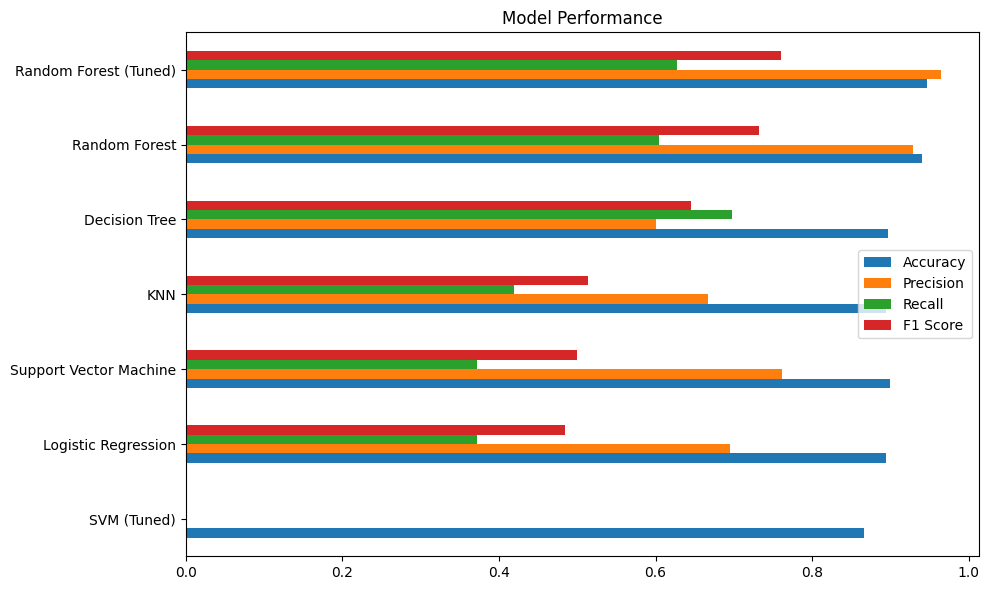

In [19]:
#Visualize
results_df.sort_values("F1 Score", ascending=True).plot(kind='barh', figsize=(10, 6), title="Model Performance")
plt.tight_layout()
plt.show()